In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [ ]:

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/15
375/375 - 8s - 22ms/step - accuracy: 0.8844 - loss: 0.3782 - val_accuracy: 0.9531 - val_loss: 0.1549
Epoch 2/15
375/375 - 4s - 11ms/step - accuracy: 0.9449 - loss: 0.1768 - val_accuracy: 0.9663 - val_loss: 0.1110
Epoch 3/15
375/375 - 6s - 16ms/step - accuracy: 0.9577 - loss: 0.1372 - val_accuracy: 0.9718 - val_loss: 0.0987
Epoch 4/15
375/375 - 4s - 12ms/step - accuracy: 0.9640 - loss: 0.1136 - val_accuracy: 0.9732 - val_loss: 0.0885
Epoch 5/15
375/375 - 5s - 14ms/step - accuracy: 0.9688 - loss: 0.0996 - val_accuracy: 0.9740 - val_loss: 0.0881
Epoch 6/15
375/375 - 4s - 11ms/step - accuracy: 0.9720 - loss: 0.0882 - val_accuracy: 0.9733 - val_loss: 0.0848
Epoch 7/15
375/375 - 4s - 11ms/step - accuracy: 0.9730 - loss: 0.0833 - val_accuracy: 0.9768 - val_loss: 0.0801
Epoch 8/15
375/375 - 6s - 17ms/step - accuracy: 0.9766 - loss: 0.0736 - val_accuracy: 0.9748 - val_loss: 0.0831
Epoch 9/15
375/375 - 10s - 26ms/step - accuracy: 0.9776 - loss: 0.0693 - val_accuracy: 0.9796 - val_loss

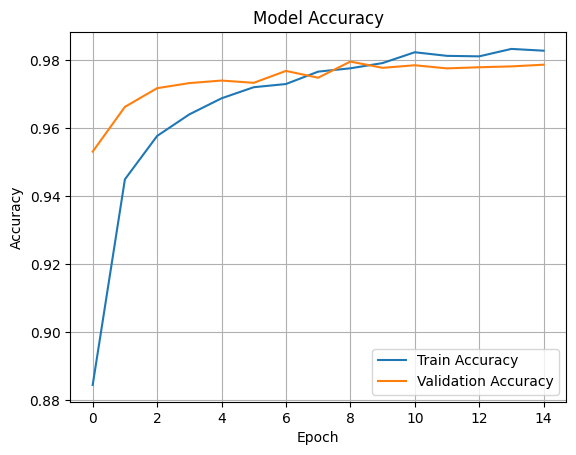

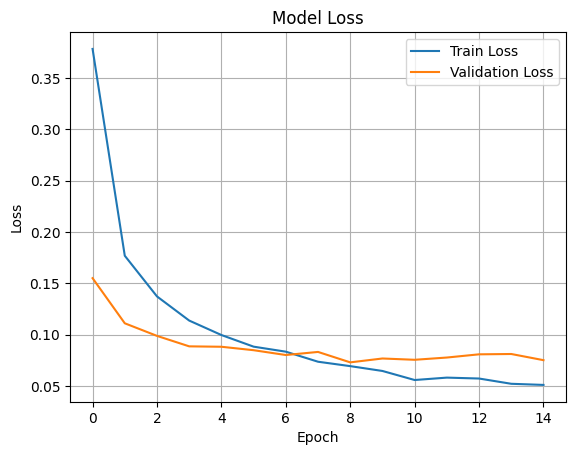

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {test_accuracy:.4f}")



 Final Test Accuracy: 0.9813
